In [ ]:
# Code for ITCS 3156 Final Project
# Runs in itcs-3156 kernel

# ITCS 3156 Final Project Code


## Name: <span style="color:blue"> *Kelley Li* </span>

In [2]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

In [ ]:
# Dataset
retail_csv = pd.read_csv("online_retail.csv")


# Data Preprocessing
retail_csv.dropna(subset=['CustomerID', 'Description'], inplace=True)

# Grouping by product and count purchases
product_freq = retail_csv.groupby('Description').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'InvoiceNo': 'nunique'
}).reset_index()

# Create label: high demand = Quantity >= threshold
threshold = product_freq['Quantity'].median()
product_freq['label'] = (product_freq['Quantity'] >= threshold).astype(int)

 # InvoiceNo = purchase frequency
features = product_freq[['UnitPrice', 'InvoiceNo']] 
labels = product_freq['label']

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       387
           1       0.93      0.91      0.92       393

    accuracy                           0.92       780
   macro avg       0.92      0.92      0.92       780
weighted avg       0.92      0.92      0.92       780



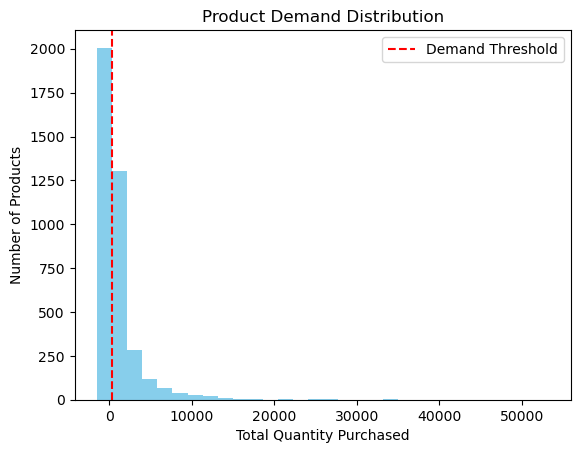

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
# Evaluation results
print(classification_report(y_test, y_pred))

# Plot
plt.hist(product_freq['Quantity'], bins=30, color='skyblue')
plt.axvline(threshold, color='red', linestyle='--', label='Demand Threshold')
plt.title('Product Demand Distribution')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Number of Products')
plt.legend()
plt.show()

Best k value: 7 with accuracy: 0.9256
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       387
           1       0.94      0.92      0.93       393

    accuracy                           0.93       780
   macro avg       0.93      0.93      0.93       780
weighted avg       0.93      0.93      0.93       780



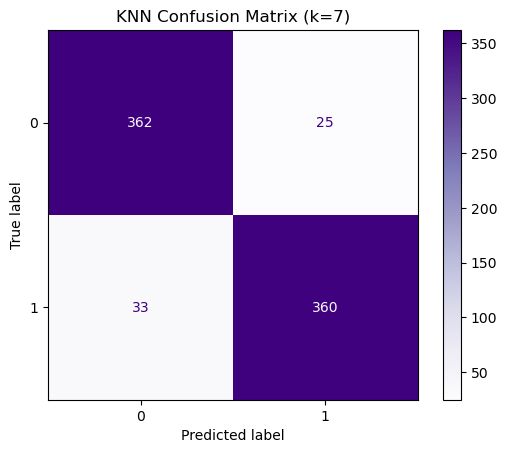

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Testing k values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

best_k = k_values[accuracies.index(max(accuracies))]
print(f'Best k value: {best_k} with accuracy: {max(accuracies):.4f}')

# KNN Model
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_knn = knn_best.predict(X_test_scaled)

# Classification Report
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_best, X_test_scaled, y_test, cmap='Purples')
plt.title(f"KNN Confusion Matrix (k={best_k})")
plt.show()